<a href="https://colab.research.google.com/github/RvM9622/DeepLearning/blob/main/Image_recognition_cat_or_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

x_train = pd.read_csv('/content/drive/MyDrive/Classroom/PGDDM 44 Hybrid/input.csv',header = None)
y_train = pd.read_csv('labels.csv',header = None)
x_test = pd.read_csv('/content/drive/MyDrive/Classroom/PGDDM 44 Hybrid/input_test.csv',header = None)
y_test = pd.read_csv('labels_test.csv',header = None)

In [16]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,37.0,39.0,25.0,26.0,24.0,9.0,34.0,25.0,10.0,49.0,...,21.0,67.0,63.0,38.0,78.0,74.0,49.0,58.0,54.0,29.0
1,131.0,128.0,135.0,160.0,157.0,164.0,198.0,192.0,204.0,204.0,...,65.0,63.0,91.0,69.0,62.0,87.0,65.0,71.0,96.0,74.0
2,80.0,92.0,88.0,83.0,96.0,89.0,76.0,92.0,82.0,74.0,...,99.0,133.0,128.0,109.0,119.0,114.0,94.0,124.0,119.0,99.0
3,149.0,173.0,151.0,131.0,153.0,132.0,156.0,173.0,155.0,143.0,...,57.0,48.0,48.0,58.0,51.0,51.0,61.0,56.0,56.0,66.0
4,255.0,254.0,239.0,253.0,246.0,228.0,255.0,252.0,233.0,254.0,...,234.0,255.0,254.0,234.0,255.0,254.0,234.0,254.0,253.0,233.0


In [17]:
x_train.shape

(2000, 30000)

In [18]:
x_test.shape

(400, 30000)

In [20]:
import numpy as np

x_train = np.loadtxt('/content/drive/MyDrive/Classroom/PGDDM 44 Hybrid/input.csv',delimiter=",")
y_train = np.loadtxt('labels.csv',delimiter=",")
x_test = np.loadtxt('/content/drive/MyDrive/Classroom/PGDDM 44 Hybrid/input_test.csv',delimiter=",")
y_test = np.loadtxt('labels_test.csv',delimiter=",")

In [21]:
x_train = x_train.reshape(len(x_train),100,100,3)
x_test = x_test.reshape(len(x_test),100,100,3)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [22]:
x_train.shape


(2000, 100, 100, 3)

In [23]:
x_train = x_train/255
x_test = x_test/255

<function matplotlib.pyplot.show(close=None, block=None)>

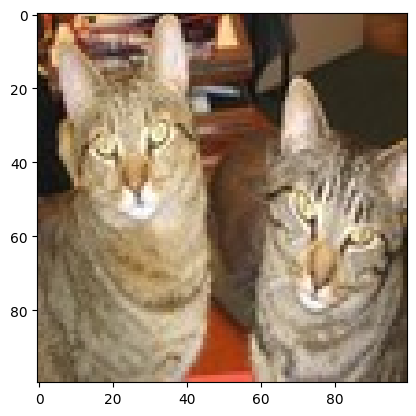

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1999])
plt.show

In [34]:
!pip install tensorflow

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = tf.keras.Sequential([Conv2D(32,(3,3), activation = "relu", input_shape = (100,100,3)),
                             MaxPooling2D((2,2)),
                             Flatten(),
                             Dense(32, activation = "relu"),
                             Dense(1,activation = "sigmoid")])

In [36]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [37]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.5160 - loss: 1.0804
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.6430 - loss: 0.6420
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.7523 - loss: 0.5446
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.8150 - loss: 0.4386
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 326ms/step - accuracy: 0.8773 - loss: 0.3567
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 236ms/step - accuracy: 0.8911 - loss: 0.2994
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.9360 - loss: 0.2293
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 236ms/step - accuracy: 0.9550 - loss: 0.1598
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.9806 - loss: 0.1157
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.9845 - loss: 0.0848


In [38]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.7066 - loss: 0.6822


[0.7712187767028809, 0.675000011920929]

In [39]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step


In [47]:
y_pred = model.predict(x_test[0].reshape(1,100,100,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Dog


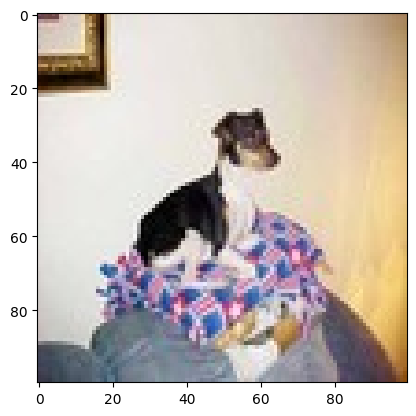

In [50]:
plt.imshow(x_test[0])
if y_pred <= 0.5:
  print("Dog")
else:
  print("Cat")